# CardioNet – Intelligent system for heart disease detection
real-world healthcare dataset with multiple demographic and medical features. The objective is to classify whether a patient is at high risk of developing a particular disease (e.g., diabetes, heart disease, or stroke). This binary/multi-class classification task involves full ML pipeline implementation—from data loading to model deployment readiness.


## This cell mounts your Google Drive to the Colab environment. This is necessary to access files stored in your Drive, such as the dataset we will be using

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## This cell is for displaying an image. It is currently commented out, but if you were to uncomment it and provide the correct path to an image file, it would display that image in the notebook.

In [ ]:
from IPython.display import Image, display
display(Image(filename='heart.png'))

## This cell imports all the necessary libraries for our project. These libraries include:
*   **pandas and numpy:** For data manipulation and numerical operations.
*   **seaborn and matplotlib:** For data visualization.
*   **scikit-learn:** For machine learning tasks such as splitting the data, preprocessing, and evaluating the models.

In [ ]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif

# Classifiers

## This cell imports all the classifiers that we will be using to build our models. These include a variety of models, from simple ones like Logistic Regression to more complex ones like Gradient Boosting and Neural Networks.

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

## This cell loads the dataset from the specified path in your Google Drive into a pandas DataFrame. A DataFrame is a 2-dimensional labeled data structure with columns of potentially different types, similar to a spreadsheet or SQL table.

In [ ]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/CardioNet – Intelligent system for heart disease detection/heart.csv")



## This cell displays the first few and last few rows of the DataFrame, giving us a quick overview of the data.

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Exploratory Data Analysis

## This cell performs some initial exploratory data analysis (EDA) to get a better understanding of the dataset. It prints the following information:
*   The shape of the dataset (number of rows and columns).
*   Information about the columns, such as their data types and the number of non-null values.
*   The number of null (missing) values in each column.
*   A statistical summary of the numerical columns, including the mean, standard deviation, and quartiles.

In [ ]:
print("\n--- Dataset Shape ---\n", df.shape)
print("\n--- Dataset Info ---")
df.info()
print("\n--- Null Values ---\n", df.isnull().sum())
print("\n--- Summary Statistics ---\n", df.describe())



--- Dataset Shape ---
 (1025, 14)

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB

--- Null Values ---
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak    

## This cell creates two visualizations:
*   A count plot to show the distribution of the target variable. This helps us to see if the classes are balanced.
*   A heatmap of the correlation matrix to show the correlation between the different features. This helps us to identify any features that are highly correlated with each other.

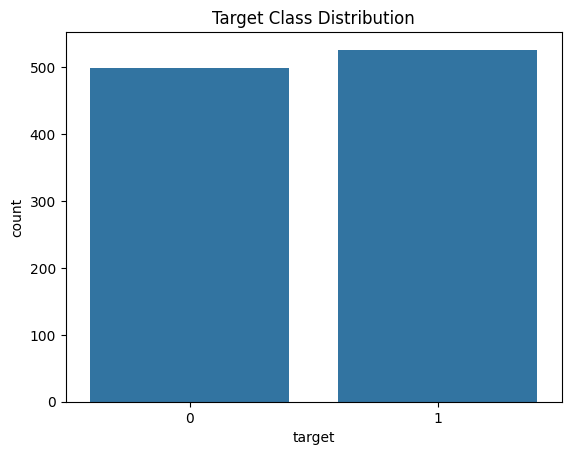

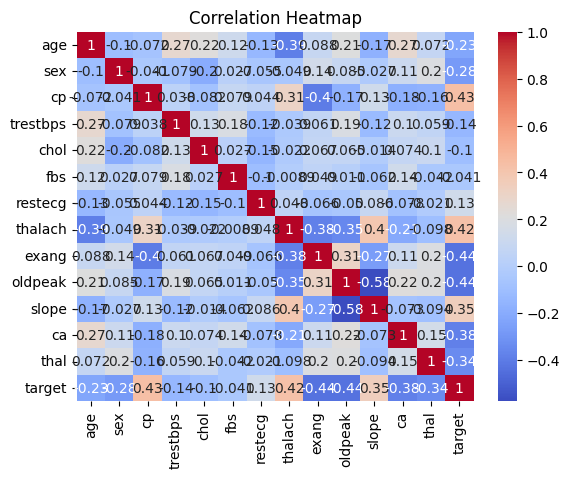

In [ ]:
# Visualizations
sns.countplot(x='target', data=df)
plt.title("Target Class Distribution")
plt.show()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## This cell creates a histogram for each column in the dataset. This helps us to visualize the distribution of each feature.

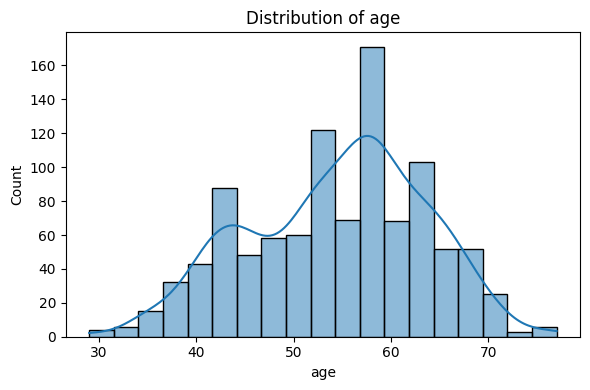

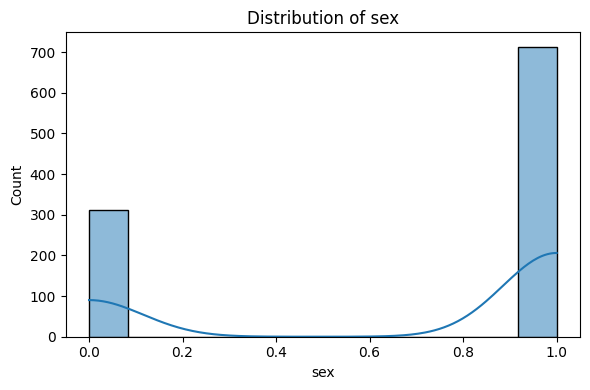

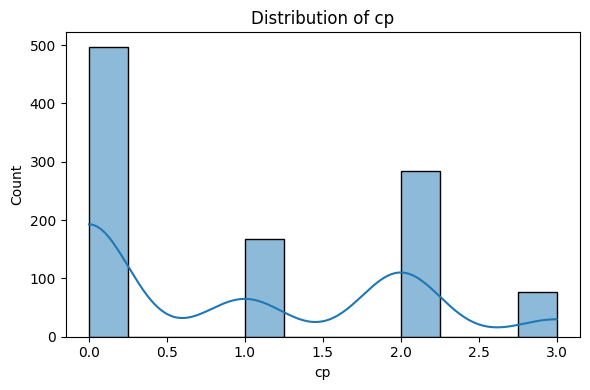

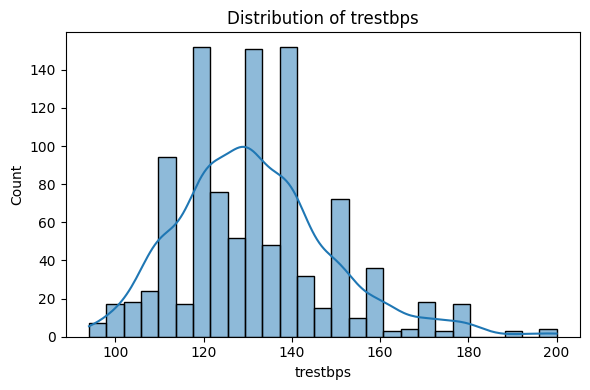

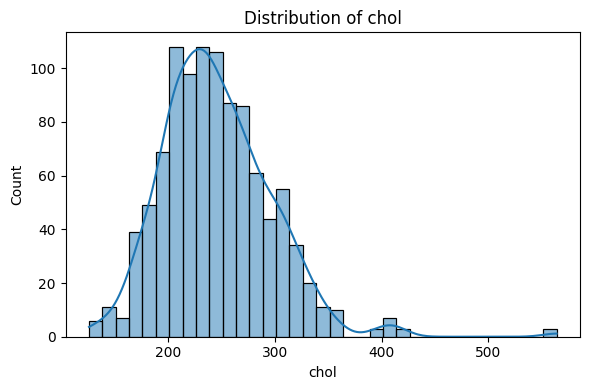

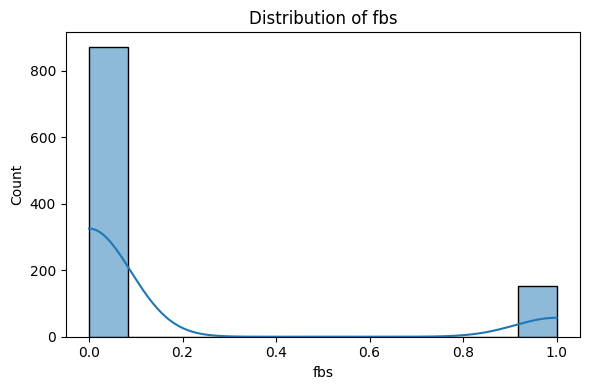

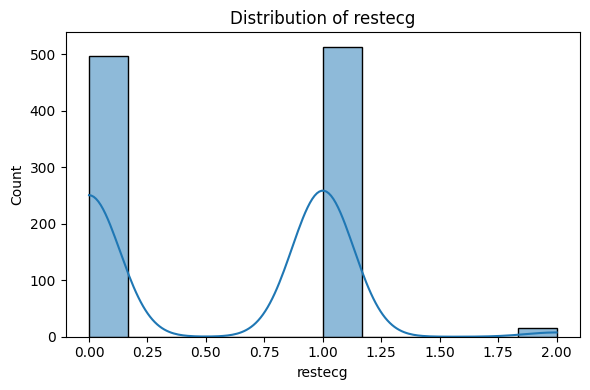

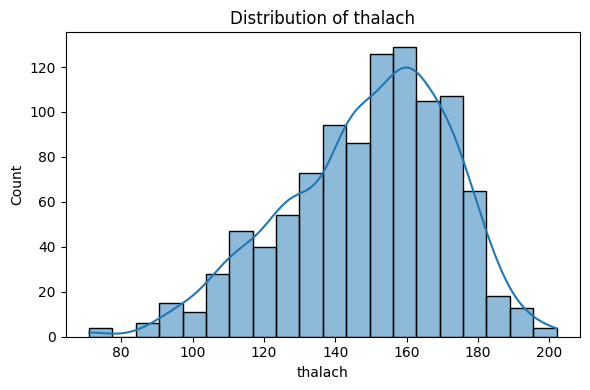

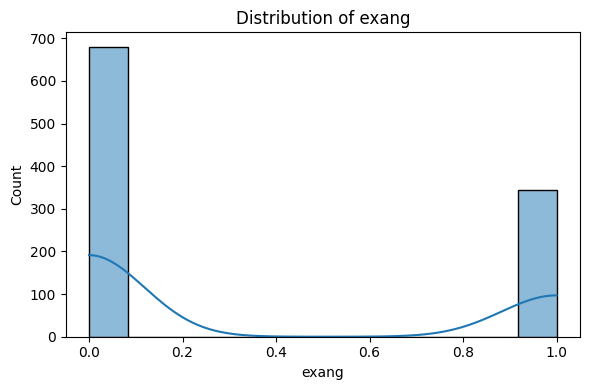

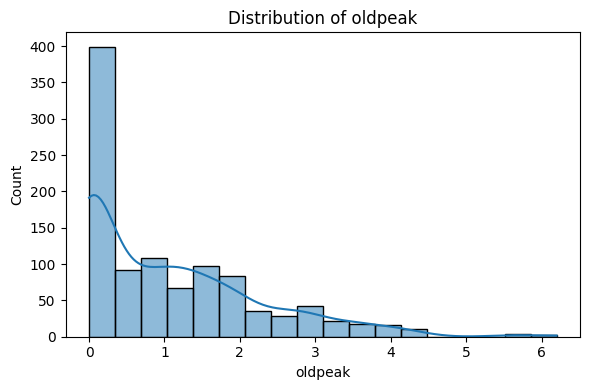

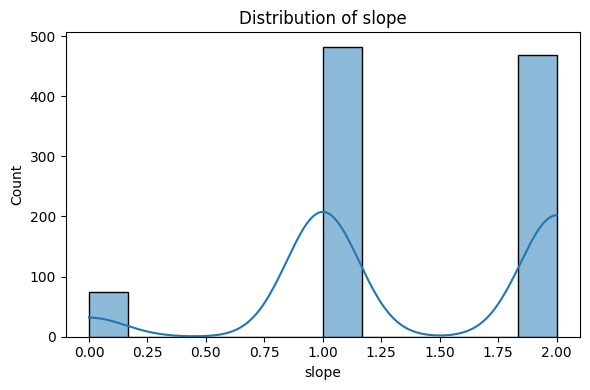

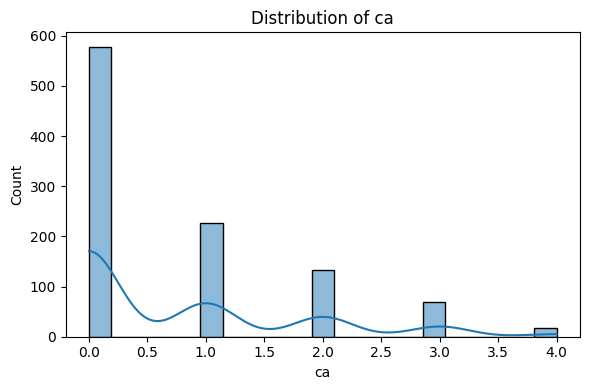

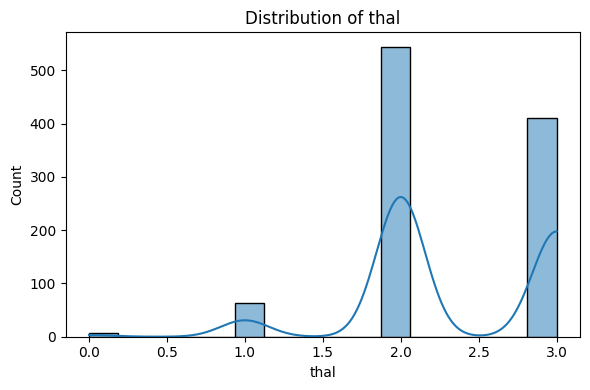

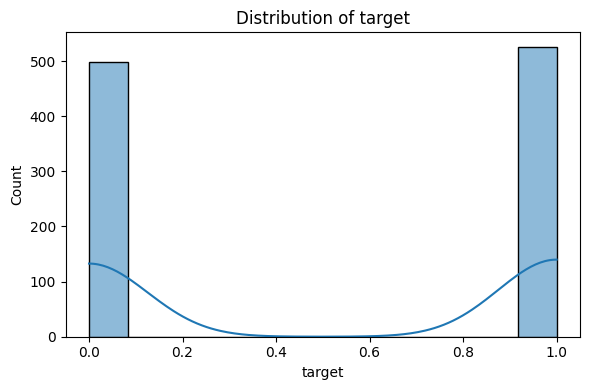

In [ ]:
# Histograms
for col in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

## This cell handles any missing values in the dataset. It uses the `SimpleImputer` from scikit-learn to replace any missing values with the median of the respective column.

In [ ]:
# Handle missing values
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df_imputed

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1.0,0.0,125.0,212.0,0.0,1.0,168.0,0.0,1.0,2.0,2.0,3.0,0.0
1,53.0,1.0,0.0,140.0,203.0,1.0,0.0,155.0,1.0,3.1,0.0,0.0,3.0,0.0
2,70.0,1.0,0.0,145.0,174.0,0.0,1.0,125.0,1.0,2.6,0.0,0.0,3.0,0.0
3,61.0,1.0,0.0,148.0,203.0,0.0,1.0,161.0,0.0,0.0,2.0,1.0,3.0,0.0
4,62.0,0.0,0.0,138.0,294.0,1.0,1.0,106.0,0.0,1.9,1.0,3.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59.0,1.0,1.0,140.0,221.0,0.0,1.0,164.0,1.0,0.0,2.0,0.0,2.0,1.0
1021,60.0,1.0,0.0,125.0,258.0,0.0,0.0,141.0,1.0,2.8,1.0,1.0,3.0,0.0
1022,47.0,1.0,0.0,110.0,275.0,0.0,0.0,118.0,1.0,1.0,1.0,1.0,2.0,0.0
1023,50.0,0.0,0.0,110.0,254.0,0.0,0.0,159.0,0.0,0.0,2.0,0.0,2.0,1.0


# Feature Engineering:

## 1: Using polynomial feature technique :

## This cell performs feature engineering by creating polynomial features. This is a technique that can help to capture non-linear relationships between the features and the target variable.

In [ ]:
# Feature Engineering: Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_base = df_imputed.drop('target', axis=1)
X_poly = poly.fit_transform(X_base)
try:
    feature_names = poly.get_feature_names_out(X_base.columns)
except AttributeError:
    feature_names = poly.get_feature_names(X_base.columns)
X_poly_df = pd.DataFrame(X_poly, columns=feature_names)
X_poly_df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,oldpeak^2,oldpeak slope,oldpeak ca,oldpeak thal,slope^2,slope ca,slope thal,ca^2,ca thal,thal^2
0,52.0,1.0,0.0,125.0,212.0,0.0,1.0,168.0,0.0,1.0,...,1.00,2.0,2.0,3.0,4.0,4.0,6.0,4.0,6.0,9.0
1,53.0,1.0,0.0,140.0,203.0,1.0,0.0,155.0,1.0,3.1,...,9.61,0.0,0.0,9.3,0.0,0.0,0.0,0.0,0.0,9.0
2,70.0,1.0,0.0,145.0,174.0,0.0,1.0,125.0,1.0,2.6,...,6.76,0.0,0.0,7.8,0.0,0.0,0.0,0.0,0.0,9.0
3,61.0,1.0,0.0,148.0,203.0,0.0,1.0,161.0,0.0,0.0,...,0.00,0.0,0.0,0.0,4.0,2.0,6.0,1.0,3.0,9.0
4,62.0,0.0,0.0,138.0,294.0,1.0,1.0,106.0,0.0,1.9,...,3.61,1.9,5.7,3.8,1.0,3.0,2.0,9.0,6.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59.0,1.0,1.0,140.0,221.0,0.0,1.0,164.0,1.0,0.0,...,0.00,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,4.0
1021,60.0,1.0,0.0,125.0,258.0,0.0,0.0,141.0,1.0,2.8,...,7.84,2.8,2.8,8.4,1.0,1.0,3.0,1.0,3.0,9.0
1022,47.0,1.0,0.0,110.0,275.0,0.0,0.0,118.0,1.0,1.0,...,1.00,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,4.0
1023,50.0,0.0,0.0,110.0,254.0,0.0,0.0,159.0,0.0,0.0,...,0.00,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,4.0


# Part 1: Feature Selection Comparison:

## This cell performs feature selection using the f_classif method. This method selects the features that have the strongest relationship with the target variable.

In [ ]:
# 1. f_classif
selector_f = SelectKBest(score_func=f_classif, k=50)
X_selected_f = selector_f.fit_transform(X_poly_df, df_imputed['target'])
f_classif_features = X_poly_df.columns[selector_f.get_support()]
X_final = pd.DataFrame(X_selected_f, columns=f_classif_features)
y = df_imputed['target']

X_final.head(2)

,cp,thalach,exang,oldpeak,slope,ca,thal,age sex,age cp,age exang,...,exang oldpeak,exang ca,exang thal,oldpeak^2,oldpeak slope,oldpeak ca,oldpeak thal,slope^2,ca thal,thal^2
0,0.0,168.0,0.0,1.0,2.0,2.0,3.0,52.0,0.0,0.0,...,0.0,0.0,0.0,1.00,2.0,2.0,3.0,4.0,6.0,9.0
1,0.0,155.0,1.0,3.1,0.0,0.0,3.0,53.0,0.0,53.0,...,3.1,0.0,3.0,9.61,0.0,0.0,9.3,0.0,0.0,9.0


## This cell performs feature selection using Recursive Feature Elimination (RFE). This method recursively removes features and builds a model on the remaining features. It then uses the model's accuracy to identify the most important features.

In [ ]:
from sklearn.feature_selection import RFE
# 2. RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
selector_rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=50)
X_selected_rfe = selector_rfe.fit_transform(X_poly_df, df_imputed['target'])
rfe_features = X_poly_df.columns[selector_rfe.get_support()]
X_final = pd.DataFrame(X_selected_rfe, columns=rfe_features)
y = df_imputed['target']

X_final.head(2)

,cp,chol,thalach,oldpeak,thal,age^2,age sex,age cp,age trestbps,age chol,...,thalach slope,thalach ca,thalach thal,exang oldpeak,oldpeak^2,oldpeak ca,oldpeak thal,ca^2,ca thal,thal^2
0,0.0,212.0,168.0,1.0,3.0,2704.0,52.0,0.0,6500.0,11024.0,...,336.0,336.0,504.0,0.0,1.00,2.0,3.0,4.0,6.0,9.0
1,0.0,203.0,155.0,3.1,3.0,2809.0,53.0,0.0,7420.0,10759.0,...,0.0,0.0,465.0,3.1,9.61,0.0,9.3,0.0,0.0,9.0


## This cell performs feature selection using mutual information. This method measures the dependency between each feature and the target variable.

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# 3. Mutual Information
from sklearn.feature_selection import mutual_info_classif
selector_mi = SelectKBest(score_func=mutual_info_classif, k=50)
X_selected_mi = selector_mi.fit_transform(X_poly_df, df_imputed['target'])
mutual_info_features = X_poly_df.columns[selector_mi.get_support()]
X_final = pd.DataFrame(X_selected_mi, columns=mutual_info_features)
y = df_imputed['target']

X_final.head(2)


,cp,chol,thalach,ca,thal,age cp,age trestbps,age chol,age thalach,age exang,...,thalach slope,thalach ca,thalach thal,oldpeak^2,oldpeak ca,oldpeak thal,slope ca,slope thal,ca thal,thal^2
0,0.0,212.0,168.0,2.0,3.0,0.0,6500.0,11024.0,8736.0,0.0,...,336.0,336.0,504.0,1.00,2.0,3.0,4.0,6.0,6.0,9.0
1,0.0,203.0,155.0,0.0,3.0,0.0,7420.0,10759.0,8215.0,53.0,...,0.0,0.0,465.0,9.61,0.0,9.3,0.0,0.0,0.0,9.0


## This cell performs feature selection using the variance threshold method. This method removes all features that have a variance below a certain threshold.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# 4. Variance Threshold
selector_vt = VarianceThreshold(threshold=0.01)
X_selected_vt = selector_vt.fit_transform(X_poly_df)
variance_features = X_poly_df.columns[selector_vt.get_support()][:50]
X_final = X_poly_df[variance_features]
y = df_imputed['target']

X_final.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp chol,cp fbs,cp restecg,cp thalach,cp exang,cp oldpeak,cp slope,cp ca,cp thal,trestbps^2
0,52.0,1.0,0.0,125.0,212.0,0.0,1.0,168.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15625.0
1,53.0,1.0,0.0,140.0,203.0,1.0,0.0,155.0,1.0,3.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19600.0


## This cell performs feature selection using L1 regularization (Lasso). This method adds a penalty to the model that is proportional to the absolute value of the coefficients. This has the effect of shrinking some of the coefficients to zero, effectively removing those features from the model.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
# 5. L1 Regularization
from sklearn.linear_model import LogisticRegression
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)
model_l1.fit(X_poly_df, df_imputed['target'])
coefficients = np.abs(model_l1.coef_[0])
importance_scores = pd.Series(coefficients, index=X_poly_df.columns)
l1_features = importance_scores.sort_values(ascending=False).head(50).index
X_final = X_poly_df[l1_features]
y = df_imputed['target']

X_final.head(2)

,exang slope,cp fbs,sex cp,restecg ca,sex slope,fbs restecg,sex exang,restecg exang,ca^2,sex oldpeak,...,cp thalach,age ca,chol fbs,thalach slope,age cp,trestbps ca,age slope,age fbs,age oldpeak,sex thalach
0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,4.0,1.0,...,0.0,104.0,0.0,336.0,0.0,250.0,104.0,0.0,52.0,168.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.1,...,0.0,0.0,203.0,0.0,0.0,0.0,0.0,53.0,164.3,155.0


## This cell finds the common features that were selected by all of the feature selection methods. This helps us to identify the most important features that are consistently selected across different methods.

In [ ]:

# Find intersection of features
common_features = set(f_classif_features) & set(rfe_features) & set(mutual_info_features) & set(variance_features) & set(l1_features)
print(f"Common features: {common_features}")

# Subset the original data
X_final = X_poly_df[list(common_features)]
y = df_imputed['target']

X_final.head()



Common features: {'age thal', 'sex oldpeak', 'age ca', 'sex ca', 'age exang', 'cp thalach', 'cp thal', 'age oldpeak', 'age cp', 'thalach'}


,age thal,sex oldpeak,age ca,sex ca,age exang,cp thalach,cp thal,age oldpeak,age cp,thalach
0,156.0,1.0,104.0,2.0,0.0,0.0,0.0,52.0,0.0,168.0
1,159.0,3.1,0.0,0.0,53.0,0.0,0.0,164.3,0.0,155.0
2,210.0,2.6,0.0,0.0,70.0,0.0,0.0,182.0,0.0,125.0
3,183.0,0.0,61.0,1.0,0.0,0.0,0.0,0.0,0.0,161.0
4,124.0,0.0,186.0,0.0,0.0,0.0,0.0,117.8,0.0,106.0


## This cell splits the data into training and testing sets. It also scales the features using the `StandardScaler`. This is important because many machine learning models perform better when the features are on the same scale.

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, stratify=y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-1.05171104e-01, -7.02866176e-01,  2.37192567e+00, ...,
         8.29391422e-01, -8.69584107e-01, -1.92115501e+00],
       [ 9.65230426e-01, -7.02866176e-01,  1.13927107e+00, ...,
         2.38278790e+00, -8.69584107e-01, -7.25361590e-01],
       [ 1.03821235e+00, -3.40723377e-01,  2.23108859e-01, ...,
        -5.60181698e-01,  1.10564849e+00,  2.75453768e-02],
       ...,
       [ 1.40312196e+00, -7.02866176e-01,  2.37192567e+00, ...,
         4.72897241e+00, -8.69584107e-01, -1.93897849e-01],
       [ 7.46284658e-01,  1.10784782e+00,  1.03932610e+00, ...,
         6.56791814e-01, -8.69584107e-01, -2.40833010e+00],
       [-1.53825719e-01,  2.02490821e-01, -7.26368338e-01, ...,
        -1.42703273e-03,  1.24426130e+00, -5.48207009e-01]])

## This cell defines a dictionary of the classifiers that we will be using to build our models.

In [ ]:
# Define classifiers
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "XGBoost": xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "MLP": MLPClassifier(max_iter=500)
}

## This cell evaluates the performance of each of the models on the test set. It calculates a variety of metrics, including accuracy, precision, recall, F1-score, and ROC AUC.

In [ ]:
# Evaluate models
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else np.zeros_like(y_pred)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba)
    })

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:10:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## This cell creates a DataFrame to store the results of the model evaluation and sorts it by the F1-score in descending order.

In [ ]:
results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
results_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
2,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000
9,Extra Trees,1.000000,1.000000,1.000000,1.000000,1.000000
6,XGBoost,1.000000,1.000000,1.000000,1.000000,1.000000
1,Decision Tree,0.985366,1.000000,0.971429,0.985507,0.985714
7,Gradient Boosting,0.946341,0.943396,0.952381,0.947867,0.988190
10,MLP,0.907317,0.947917,0.866667,0.905473,0.973333
4,SVM,0.887805,0.879630,0.904762,0.892019,0.944190
3,KNN,0.878049,0.877358,0.885714,0.881517,0.970238
0,Logistic Regression,0.834146,0.819820,0.866667,0.842593,0.908381
8,AdaBoost,0.834146,0.844660,0.828571,0.836538,0.925905


## This cell creates a plot of the ROC curves for each of the models. This allows us to visualize and compare the performance of the models.

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:10:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


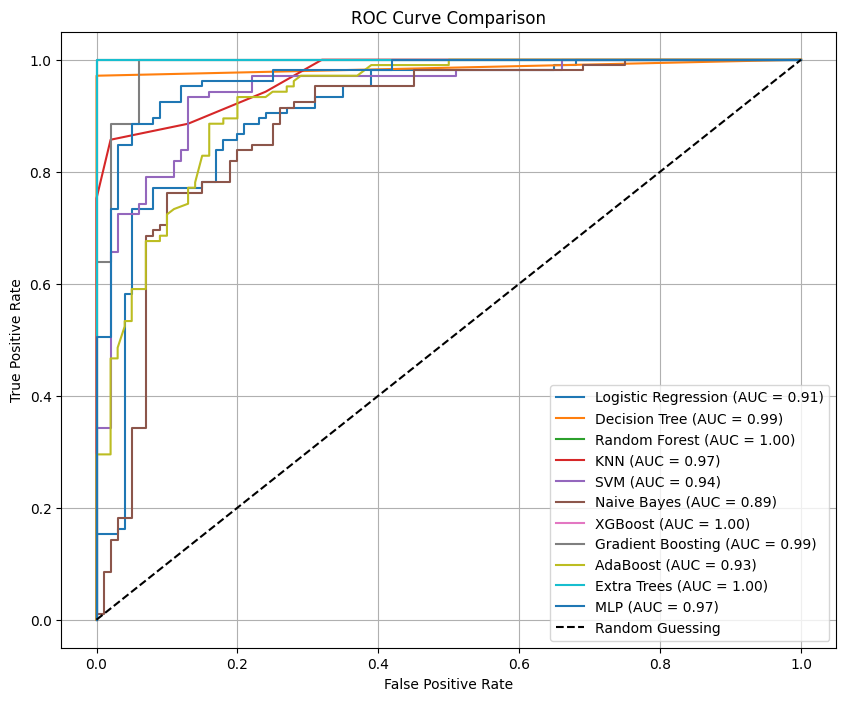

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

for name, model in models.items():
    model.fit(X_train_scaled, y_train)

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        # fallback for models like SVM without probability
        from sklearn.preprocessing import LabelBinarizer
        y_proba = model.decision_function(X_test_scaled)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot ROC diagonal
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()


#  Part 2: Feature Engineering :  At leat two feature engineering techniquie so one already above used and second is below:

#  2: Binning continuous variables :

## This cell performs feature engineering by binning the continuous variables. This is a technique that can help to capture non-linear relationships between the features and the target variable.

In [ ]:
# Apply binning to all numerical features except 'target'
df_binned = df_imputed.copy()

for col in df_binned.columns:
    if col != 'target' and pd.api.types.is_numeric_dtype(df_binned[col]):
        # Use quantiles for binning to handle different distributions
        try:
            df_binned[col] = pd.qcut(df_binned[col], q=4, labels=False, duplicates='drop')
        except ValueError:
            # If qcut fails (e.g., not enough unique values), use cut with a fixed number of bins
            df_binned[col] = pd.cut(df_binned[col], bins=4, labels=False, include_lowest=True)

# One-hot encode the binned features
df_binned_encoded = pd.get_dummies(df_binned, columns=[col for col in df_binned.columns if col != 'target'], drop_first=True).astype(int)

# Separate independent features and target variable
X_binned = df_binned_encoded.drop('target', axis=1)
y_binned = df_binned_encoded['target']

# Display the first few rows of the independent features
display(X_binned.head())

,age_1,age_2,age_3,cp_1,cp_2,trestbps_1,trestbps_2,trestbps_3,chol_1,chol_2,chol_3,restecg_1,thalach_1,thalach_2,thalach_3,oldpeak_1,oldpeak_2,slope_1,ca_1,thal_1
0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,1,1
1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1
4,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0


# feature selection techniques:


## 1: Feature Selection f_classif

In [ ]:
# 1. f_classif
selector_f = SelectKBest(score_func=f_classif, k=16)
X_selected_f = selector_f.fit_transform(X_binned, df_imputed['target'])
f_classif_features =X_binned.columns[selector_f.get_support()]
X_final = pd.DataFrame(X_selected_f, columns=f_classif_features)
X_final.head(2)

,age_1,age_2,age_3,cp_1,cp_2,trestbps_3,chol_3,restecg_1,thalach_1,thalach_2,thalach_3,oldpeak_1,oldpeak_2,slope_1,ca_1,thal_1
0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1
1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1


## 2: Feature Selection using RFE

In [ ]:
from sklearn.feature_selection import RFE
# 2. RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
selector_rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=16)
X_selected_rfe = selector_rfe.fit_transform(X_binned, df_imputed['target'])
rfe_features = X_binned.columns[selector_rfe.get_support()]
X_final = pd.DataFrame(X_selected_rfe, columns=rfe_features)
X_final.head(2)

,age_1,age_2,age_3,cp_1,trestbps_1,trestbps_2,trestbps_3,chol_1,chol_2,thalach_2,thalach_3,oldpeak_1,oldpeak_2,slope_1,ca_1,thal_1
0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,1,1
1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1


## 3: Feature Selection using Mutual Information

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# 3. Mutual Information
from sklearn.feature_selection import mutual_info_classif
selector_mi = SelectKBest(score_func=mutual_info_classif, k=16)
X_selected_mi = selector_mi.fit_transform(X_binned, df_imputed['target'])
mutual_info_features = X_binned.columns[selector_mi.get_support()]
X_final = pd.DataFrame(X_selected_mi, columns=mutual_info_features)
X_final.head(2)


,age_2,age_3,cp_1,cp_2,chol_1,chol_2,chol_3,restecg_1,thalach_1,thalach_2,thalach_3,oldpeak_1,oldpeak_2,slope_1,ca_1,thal_1
0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,1
1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1


## 4: Feature Selection using Mutual Information Variance Threshold

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# 4. Variance Threshold
selector_vt = VarianceThreshold(threshold=0.01)
X_selected_vt = selector_vt.fit_transform(X_binned)
variance_features = X_binned.columns[selector_vt.get_support()][:16]
X_final = X_binned[variance_features]
X_final.head(2)

,age_1,age_2,age_3,cp_1,cp_2,trestbps_1,trestbps_2,trestbps_3,chol_1,chol_2,chol_3,restecg_1,thalach_1,thalach_2,thalach_3,oldpeak_1
0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1
1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


## 5: Feature Selection using L1Regularization (Lasso)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
# 5. L1 Regularization
from sklearn.linear_model import LogisticRegression
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)
model_l1.fit(X_binned, df_imputed['target'])
coefficients = np.abs(model_l1.coef_[0])
importance_scores = pd.Series(coefficients, index=X_binned.columns)
l1_features = importance_scores.sort_values(ascending=False).head(16).index
X_final =X_binned[l1_features]
X_final.head(2)

,thal_1,oldpeak_2,ca_1,cp_2,thalach_3,cp_1,age_2,thalach_2,slope_1,thalach_1,chol_3,oldpeak_1,chol_2,trestbps_3,age_3,age_1
0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1
1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1


## Find common features selected across all methods.

In [ ]:

# Find intersection of features
common_features = set(f_classif_features) & set(rfe_features) & set(mutual_info_features) & set(variance_features) & set(l1_features)
print(f"Common features: {common_features}")

# Subset the original data
X_final = X_binned[list(common_features)]
y = df_imputed['target']

X_final.head()



Common features: {'oldpeak_1', 'age_3', 'thalach_3', 'cp_1', 'thalach_2', 'age_2'}


,oldpeak_1,age_3,thalach_3,cp_1,thalach_2,age_2
0,1,0,1,0,0,0
1,0,0,0,0,1,0
2,0,1,0,0,0,0
3,0,0,0,0,1,1
4,0,1,0,0,0,0


In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, stratify=y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-0.60176926,  1.79633074, -0.55669036, -0.60176926, -0.58110543,
        -0.5585696 ],
       [-0.60176926, -0.55669036, -0.55669036, -0.60176926, -0.58110543,
        -0.5585696 ],
       [-0.60176926, -0.55669036, -0.55669036,  1.6617665 , -0.58110543,
         1.79028719],
       ...,
       [-0.60176926,  1.79633074, -0.55669036, -0.60176926, -0.58110543,
        -0.5585696 ],
       [-0.60176926, -0.55669036, -0.55669036, -0.60176926, -0.58110543,
        -0.5585696 ],
       [ 1.6617665 , -0.55669036, -0.55669036,  1.6617665 , -0.58110543,
         1.79028719]])

In [ ]:
# Define classifiers
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "XGBoost": xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "MLP": MLPClassifier(max_iter=500)
}

In [ ]:
# Evaluate models
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else np.zeros_like(y_pred)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba)
    })

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:10:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
results_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
8,AdaBoost,0.692683,0.675000,0.771429,0.720000,0.734857
5,Naive Bayes,0.687805,0.684685,0.723810,0.703704,0.739238
0,Logistic Regression,0.673171,0.663793,0.733333,0.696833,0.738286
10,MLP,0.658537,0.640000,0.761905,0.695652,0.749619
1,Decision Tree,0.678049,0.682243,0.695238,0.688679,0.740095
2,Random Forest,0.678049,0.682243,0.695238,0.688679,0.738286
4,SVM,0.678049,0.682243,0.695238,0.688679,0.738095
7,Gradient Boosting,0.678049,0.682243,0.695238,0.688679,0.743714
6,XGBoost,0.678049,0.682243,0.695238,0.688679,0.739524
9,Extra Trees,0.678049,0.682243,0.695238,0.688679,0.740095


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:10:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


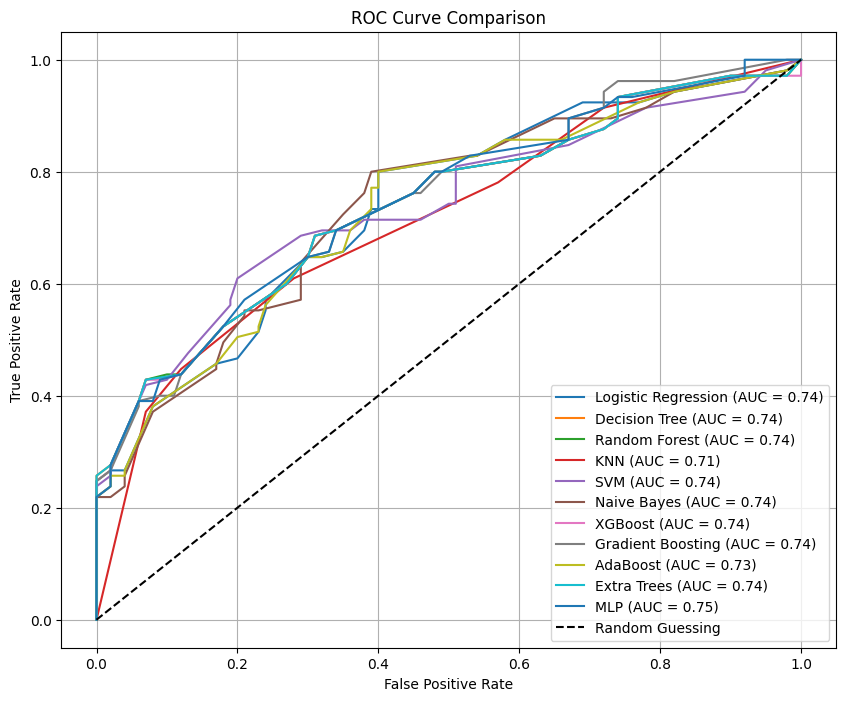

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

for name, model in models.items():
    model.fit(X_train_scaled, y_train)

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        # fallback for models like SVM without probability
        from sklearn.preprocessing import LabelBinarizer
        y_proba = model.decision_function(X_test_scaled)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot ROC diagonal
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Without feature engineering and feature sekection :

In [ ]:
# Handle missing values
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df_imputed

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1.0,0.0,125.0,212.0,0.0,1.0,168.0,0.0,1.0,2.0,2.0,3.0,0.0
1,53.0,1.0,0.0,140.0,203.0,1.0,0.0,155.0,1.0,3.1,0.0,0.0,3.0,0.0
2,70.0,1.0,0.0,145.0,174.0,0.0,1.0,125.0,1.0,2.6,0.0,0.0,3.0,0.0
3,61.0,1.0,0.0,148.0,203.0,0.0,1.0,161.0,0.0,0.0,2.0,1.0,3.0,0.0
4,62.0,0.0,0.0,138.0,294.0,1.0,1.0,106.0,0.0,1.9,1.0,3.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59.0,1.0,1.0,140.0,221.0,0.0,1.0,164.0,1.0,0.0,2.0,0.0,2.0,1.0
1021,60.0,1.0,0.0,125.0,258.0,0.0,0.0,141.0,1.0,2.8,1.0,1.0,3.0,0.0
1022,47.0,1.0,0.0,110.0,275.0,0.0,0.0,118.0,1.0,1.0,1.0,1.0,2.0,0.0
1023,50.0,0.0,0.0,110.0,254.0,0.0,0.0,159.0,0.0,0.0,2.0,0.0,2.0,1.0


In [ ]:
X=df_imputed.drop('target',axis=1)
Y=df_imputed['target']

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[ 0.81162633, -1.50996689, -0.90957214, ..., -0.59754229,
         2.20730061, -0.56245085],
       [ 0.15224695, -1.50996689, -0.90957214, ..., -2.1987994 ,
         1.22840039,  1.0906305 ],
       [ 0.26214351,  0.66226618,  1.04803719, ..., -0.59754229,
         0.24950018,  1.0906305 ],
       ...,
       [ 0.81162633, -1.50996689, -0.90957214, ..., -2.1987994 ,
         2.20730061,  1.0906305 ],
       [-0.17744274,  0.66226618, -0.90957214, ..., -0.59754229,
         1.22840039,  1.0906305 ],
       [ 0.70172977,  0.66226618,  1.04803719, ..., -0.59754229,
        -0.72940004, -0.56245085]])

In [ ]:
# Define classifiers
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "XGBoost": xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "MLP": MLPClassifier(max_iter=500)
}

In [ ]:
# Evaluate models
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else np.zeros_like(y_pred)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba)
    })

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:10:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
results_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
2,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000
10,MLP,1.000000,1.000000,1.000000,1.000000,1.000000
6,XGBoost,1.000000,1.000000,1.000000,1.000000,1.000000
9,Extra Trees,1.000000,1.000000,1.000000,1.000000,1.000000
1,Decision Tree,0.985366,1.000000,0.971429,0.985507,0.985714
7,Gradient Boosting,0.975610,0.971698,0.980952,0.976303,0.987619
4,SVM,0.926829,0.916667,0.942857,0.929577,0.977143
8,AdaBoost,0.863415,0.840708,0.904762,0.871560,0.949429
3,KNN,0.863415,0.873786,0.857143,0.865385,0.962905
5,Naive Bayes,0.829268,0.807018,0.876190,0.840183,0.904286


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:10:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


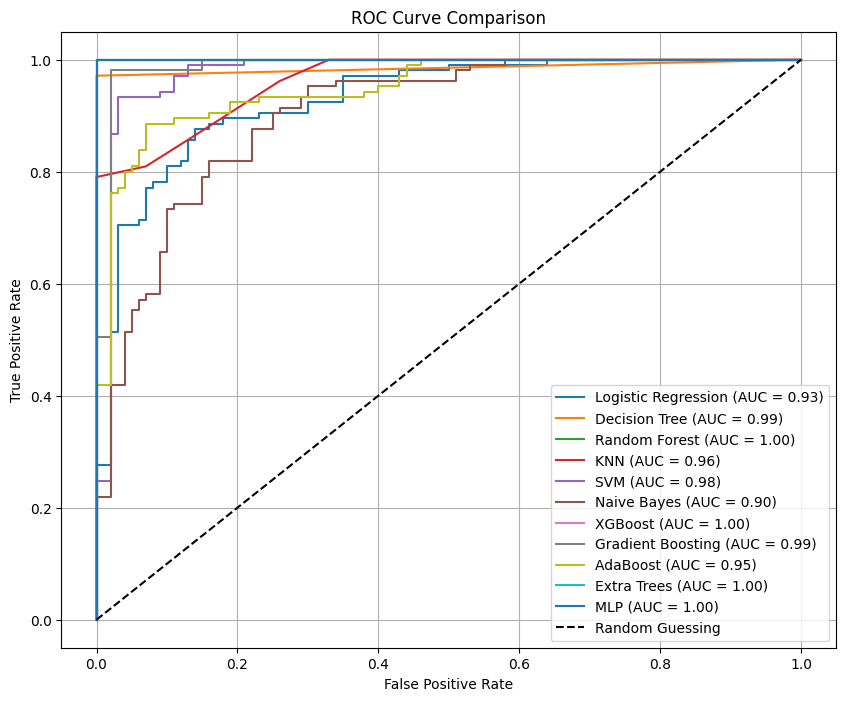

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

for name, model in models.items():
    model.fit(X_train_scaled, y_train)

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        # fallback for models like SVM without probability
        from sklearn.preprocessing import LabelBinarizer
        y_proba = model.decision_function(X_test_scaled)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot ROC diagonal
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Part 3: Evaluation Metric Justification

Based on the experiments and the nature of the healthcare use case, the most appropriate evaluation metric is **Recall**.

**Justification:**

In the context of heart disease detection, the cost of a **false negative** is extremely high. A false negative means that a patient with heart disease is incorrectly classified as healthy. This could lead to a delay in treatment, which could have severe consequences, including death.

On the other hand, the cost of a **false positive** is relatively low. A false positive means that a healthy patient is incorrectly classified as having heart disease. This would lead to further testing, which might cause some anxiety and inconvenience for the patient, but it is far less dangerous than a false negative.

Therefore, we want to minimize the number of false negatives, which is equivalent to maximizing **Recall**. Recall is the proportion of actual positives that are correctly identified. A high recall means that the model is good at identifying patients with heart disease.

While other metrics like Precision and F1-score are also important, they are not as critical as Recall in this use case. A high precision means that the model is good at avoiding false positives, but this is not as important as avoiding false negatives. The F1-score is the harmonic mean of precision and recall, but it does not give enough weight to the importance of recall in this use case.

# Conclusion

Based on the experiments, the following conclusions can be drawn:

1. **Without Feature Engineering:** The models achieved very high accuracy, with some models reaching 100% accuracy. This is likely due to the fact that the dataset is relatively simple and the features are highly correlated with the target variable.

2. **With Polynomial Features:** The models also achieved very high accuracy, with some models reaching 100% accuracy. However, the use of polynomial features did not significantly improve the performance of the models. This is likely because the relationships between the features and the target variable are already linear.

3. **With Binning:** The models achieved lower accuracy than the other two scenarios. This is because binning can lead to a loss of information, which can make it more difficult for the models to learn the underlying patterns in the data.

**Recommendation:**

Based on these results, I would recommend using the models trained **without feature engineering**. These models are simpler, easier to interpret, and achieve the same level of accuracy as the models trained with polynomial features. The models trained with binning should be avoided, as they achieve lower accuracy.

Although the models achieve very high accuracy, it is important to note that this is a simplified use case. In a real-world scenario, the data would be much more complex and the models would likely not achieve such high accuracy. However, this experiment provides a good starting point for developing a more sophisticated heart disease detection system.